In [1]:
import collections, math, os, sys
sys.path.insert(0, '../../../../FISH-annotation/Annotation')
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from QuantiusAnnotation import QuantiusAnnotation
from sklearn.neighbors import KDTree
from matplotlib.lines import Line2D
import util
import pandas as pd
import matplotlib.pyplot as plt

# ROC Curve
Sensitivity = TPR vs. Specificity = 1 - FPR

In [2]:
density_list = [0.0025, 0.0027, 0.003, 0.0037, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]
clustering_params = ['AffinityPropagation', -350]
correctness_threshold = 4
declumping_params = ['KMeans', 2]
height = 300
cwd = os.getcwd()

In [3]:
data = []
json_paths = [cwd + '/anno/Fig2B.json',
              cwd + '/anno/Fig2B_inv.json']

sensitivity_lists = []
specificity_lists = []
# for each file
for json_path in json_paths:
    
    sensitivity_list = []
    specificity_list = []
    
    # for each image
    for density in density_list:
        print(density)
        
        if(json_path == json_paths[0]):
            img_name = 'snr_9_1_density_' + str(density) + '_spot_img.png'
            img_path = cwd + '/spot_images/og/' + img_name
        else:
            img_name = 'snr_9_1_density_' + str(density) + '_spot_img_inv.png'
            img_path = cwd + '/spot_images/inv/' + img_name
        
        csv_path = cwd + '/spot_data/' + 'snr_9_1_density_' + str(density) + '_coord_snr_list.csv'
        
        """ Get cluster centroids """
        qa = QuantiusAnnotation(json_path, img_name)
        anno_all = qa.df()
        sa = SpotAnnotationAnalysis(qa)

        clusters = sa.get_clusters(anno_all, clustering_params)
        cluster_size_threshold = util.get_cluster_size_threshold(clusters)
        small_clusters, large_clusters = util.sort_clusters_by_size(clusters, cluster_size_threshold)
        clumpiness_threshold = util.get_clumpiness_threshold(large_clusters)
        clumpy_clusters, nonclumpy_clusters = util.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
        result_clusters = nonclumpy_clusters
        for i in range(len(clumpy_clusters.index)):
            subclusters = util.declump(clumpy_clusters, i, declumping_params)
            result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)

        tpr, fpr = util.calc_fpr_tpr(clusters=result_clusters, csv_filepath=csv_path)
        sensitivity_list.append(tpr)
        specificity_list.append(1-fpr)
    
    sensitivity_lists.append(sensitivity_list)
    specificity_lists.append(specificity_list)
           

0.0025
0.0027
0.003
0.0037
0.004
0.005
0.006
0.007
0.008
0.009
0.0025
0.0027
0.003
0.0037
0.004
0.005
0.006
0.007
0.008
0.009


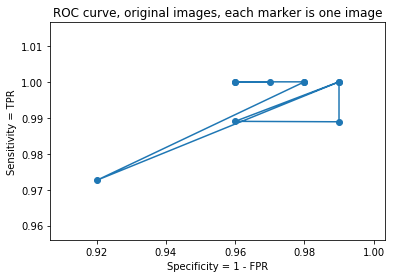

In [7]:
fig = plt.figure()
plt.scatter(sensitivity_lists[0], specificity_lists[0])
plt.plot(sensitivity_lists[0], specificity_lists[0])
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC curve, original images, each marker is one image')
plt.show()

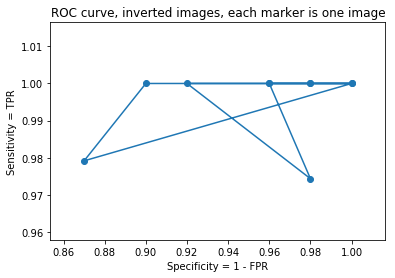

In [8]:
fig = plt.figure()
plt.scatter(sensitivity_lists[1], specificity_lists[1])
plt.plot(sensitivity_lists[1], specificity_lists[1])
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC curve, inverted images, each marker is one image')
plt.show()